In [1]:
%matplotlib widget

In [2]:
# This makes the jupyter notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import pytz
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
def rust_demo(bins, threshold, pump_timer, pump_delay=1, title=None):
    # Calculating pump-off cycles
    pump_off = None
    pump_off_times = []
    for idx,row in bins.iterrows():
        
        # if value above threshold, note start time
        if row['taxon_perL'] >= threshold:
            if pump_off is None:
                pump_off = row['sample_time']

        # if perL below threshold and pump timer has elapsed, note time to turn pump on again
        elif pump_off and row['sample_time']-pump_off > dt.timedelta(hours=pump_timer):
            pump_off_times.append((pump_off,row['sample_time']))
            pump_off = None

    # create plot object
    plt.ion()
    fig, ax = plt.subplots(figsize=(10,4))

    # plot a vertical span for each pump off-on cycle
    for pump_off_time, pump_on_time in pump_off_times:
        ax.axvspan(xmin=pump_off_time+dt.timedelta(hours=pump_delay), 
                   xmax=pump_on_time+dt.timedelta(hours=pump_delay), 
                   alpha=0.25, color='orange')

    # plot cells per liter timeseries
    ax.plot(bins['sample_time'],bins['taxon_perL'])

    # plot horizontal threshold line
    ax.hlines(xmin=bins.sample_time[0],
              xmax=bins.sample_time[-1],
              y=threshold, color='black', linewidth=1)

    # annotations
    plt.ylabel("Cells per Liter")
    if title: plt.title(title)
    plt.xticks(rotation=40, ha='right')

    return fig

# Select Datafile

In [5]:
df2017 = pd.read_csv('Margalefidinium_2017.csv', index_col='pid', parse_dates=['sample_time'])
df2018 = pd.read_csv('Margalefidinium_2018.csv', index_col='pid', parse_dates=['sample_time'])
df2018.head(3)

,sample_time,bin_ml,bin_added,taxon_count,taxon_perL,taxon_added
pid,,,,,,
D20180720T001308_IFCB124,2018-07-20 00:13:08+00:00,3.394,2021-08-04 18:17:39+00:00,16,4714.201532,2021-08-04 18:17:39+00:00
D20180720T003633_IFCB124,2018-07-20 00:36:33+00:00,3.808,2021-08-04 18:17:39+00:00,56,14705.882353,2021-08-04 18:17:39+00:00
D20180720T005949_IFCB124,2018-07-20 00:59:49+00:00,3.810,2021-08-04 18:17:39+00:00,65,17060.367454,2021-08-04 18:17:39+00:00


FigureCanvasNbAgg()

FigureCanvasNbAgg()

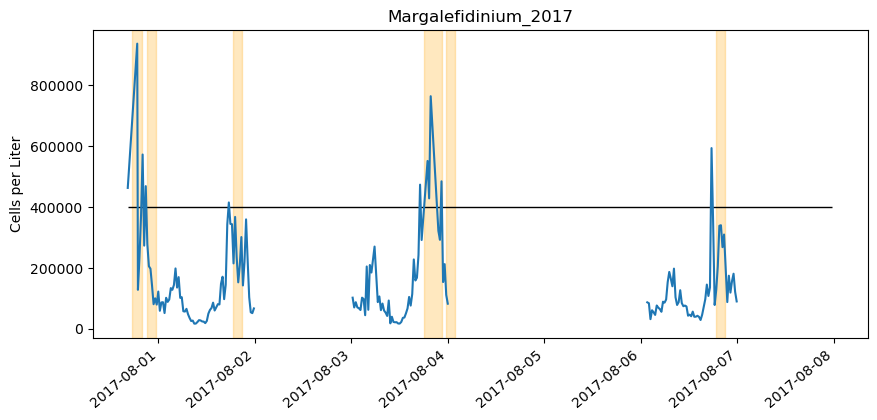

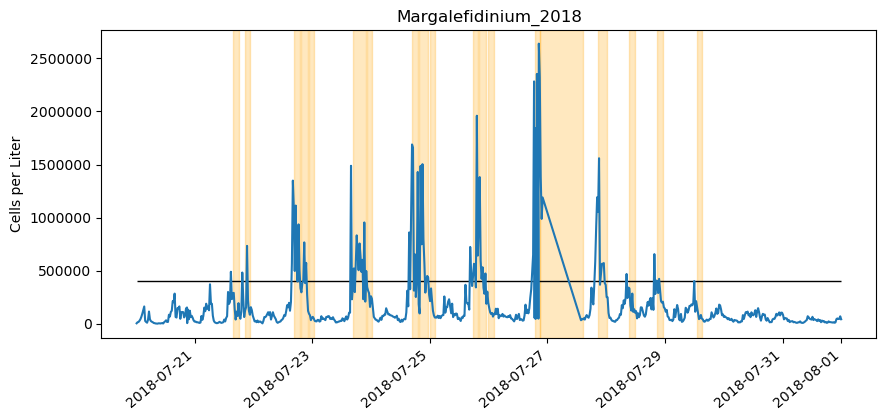

In [6]:
mask2017 = [True]*len(df2017)
mask2018 = [True]*len(df2018)

#start = dt.datetime(2020, 9, 12, tzinfo=pytz.UTC)
#end   = dt.datetime(2018, 8, 1, tzinfo=pytz.UTC)
#mask  = (df['sample_time'] > start) & (df['sample_time'] <= end)

mask2017 = df2017['sample_time'] <= dt.datetime(2017, 8, 8, tzinfo=pytz.UTC)
mask2018 = df2018['sample_time'] <= dt.datetime(2018, 8, 1, tzinfo=pytz.UTC)

TRESHOLD = 400000   # counts per liter
PUMP_TIMER = 2      # hours

fig2017 = rust_demo(df2017[mask2017], TRESHOLD, PUMP_TIMER, title='Margalefidinium_2017')
fig2018 = rust_demo(df2018[mask2018], TRESHOLD, PUMP_TIMER, title='Margalefidinium_2018')

display(fig2017)
display(fig2018)

In [7]:
#fig2017.savefig('plot_2017.png')
#fig2018.savefig('plot_2018.png')